<a href="https://colab.research.google.com/github/grumpybavarian/tensorflow2.0/blob/master/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.__version__

Num GPUs Available:  1


'2.0.0'

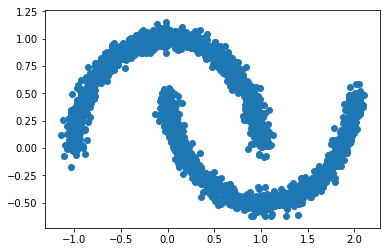

In [34]:
batch_size = 256
X, _ = make_moons(n_samples=2000, noise=0.05)
plt.scatter(X[:, 0], X[:, 1])

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices(X).shuffle(len(X)).batch(batch_size)

In [0]:
# generator model
generator = keras.Sequential([keras.layers.Dense(units=64),
                              keras.layers.BatchNormalization(),
                              keras.layers.LeakyReLU(),
                              keras.layers.Dense(units=64),
                              keras.layers.BatchNormalization(),
                              keras.layers.LeakyReLU(),
                              keras.layers.Dense(units=64),
                              keras.layers.BatchNormalization(),
                              keras.layers.LeakyReLU(),
                              keras.layers.Dense(units=2)
])

In [0]:
# discriminator model
discriminator = keras.Sequential([keras.layers.Dense(units=64),
                                  keras.layers.LeakyReLU(),
                                  keras.layers.Dropout(0.25),
                                  keras.layers.Dense(units=64),
                                  keras.layers.LeakyReLU(),
                                  keras.layers.Dropout(0.25),
                                  keras.layers.Dense(units=64),
                                  keras.layers.LeakyReLU(),
                                  keras.layers.Dropout(0.25),
                                  keras.layers.Dense(units=1)
])

In [0]:
bce = keras.losses.BinaryCrossentropy(from_logits=True)

In [0]:
generator_optimiser = keras.optimizers.Adam(1e-4)
discriminator_optimiser = keras.optimizers.Adam(1e-4)

In [0]:
# define a random "seed" that is used to monitor generation progress
sampling_seeds = tf.random.normal(shape=(500, 64))

In [0]:
def sample():
  return generator(sampling_seeds, training=False)

In [0]:
@tf.function
def train(batch):
  noise = tf.random.normal((batch.shape[0], 64))

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(noise, training=True)

    disc_output_real = discriminator(batch, training=True)
    disc_output_fake = discriminator(gen_output, training=True)

    gen_loss = bce(tf.ones_like(disc_output_fake), disc_output_fake)
    disc_loss_real = bce(tf.ones_like(disc_output_real), disc_output_real)
    disc_loss_fake = bce(tf.zeros_like(disc_output_fake), disc_output_fake)
    disc_loss = disc_loss_real + disc_loss_fake

    gen_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimiser.apply_gradients(zip(gen_grads, generator.trainable_variables))
  discriminator_optimiser.apply_gradients(zip(disc_grads, discriminator.trainable_variables))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




Epoch: 0 / 5000


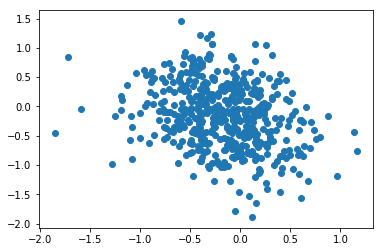


Epoch: 100 / 5000


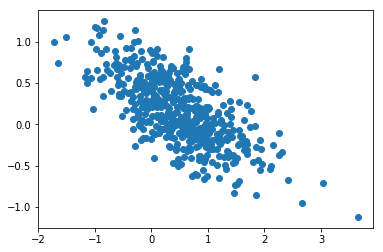


Epoch: 200 / 5000


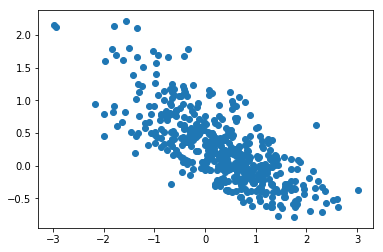


Epoch: 300 / 5000


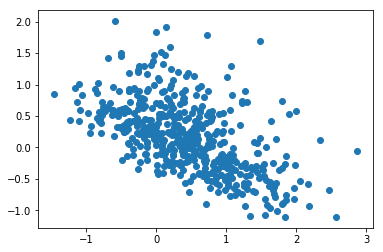


Epoch: 400 / 5000


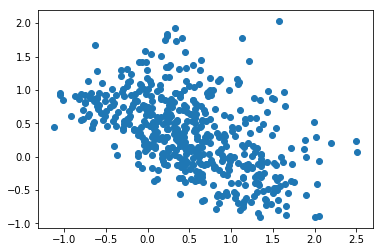


Epoch: 500 / 5000


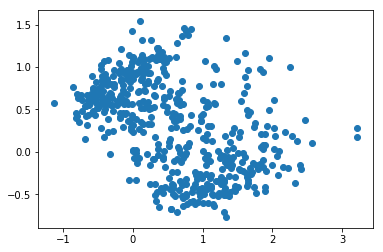


Epoch: 600 / 5000


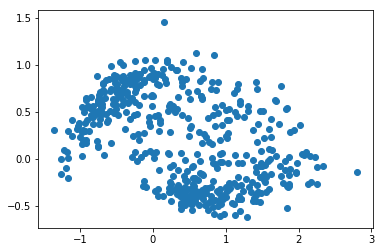


Epoch: 700 / 5000


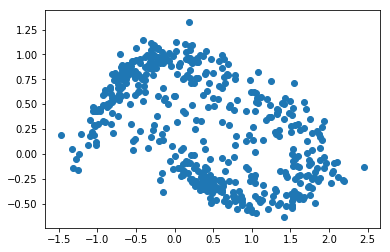


Epoch: 800 / 5000


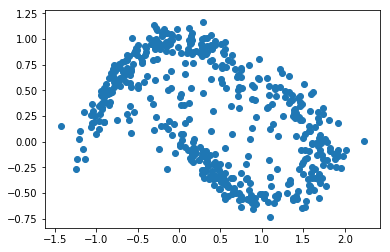


Epoch: 900 / 5000


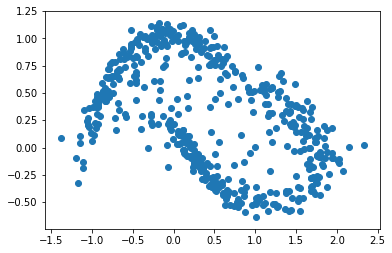


Epoch: 1000 / 5000


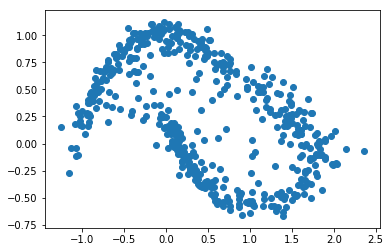


Epoch: 1100 / 5000


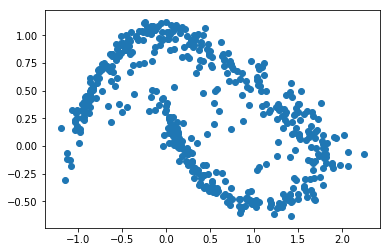


Epoch: 1200 / 5000


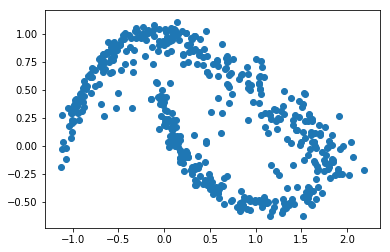


Epoch: 1300 / 5000


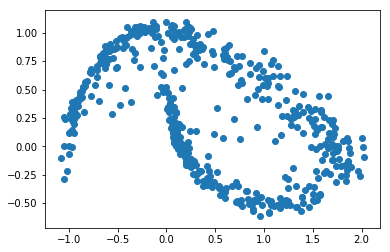


Epoch: 1400 / 5000


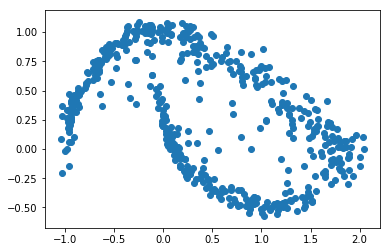


Epoch: 1500 / 5000


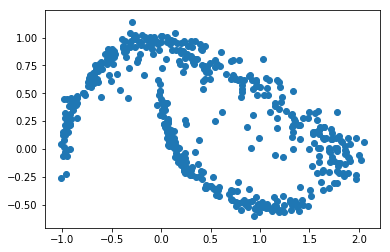


Epoch: 1600 / 5000


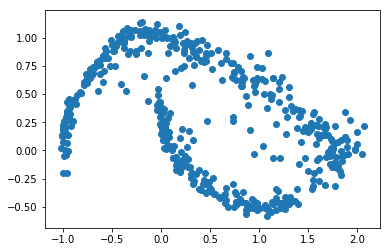


Epoch: 1700 / 5000


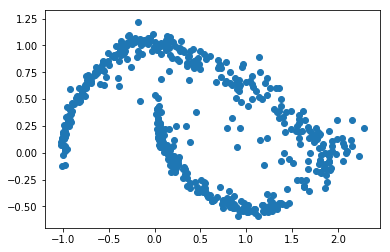


Epoch: 1800 / 5000


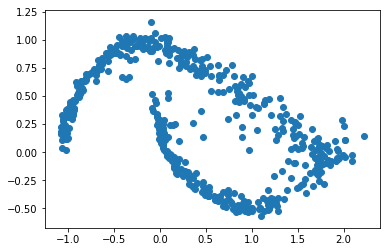


Epoch: 1900 / 5000


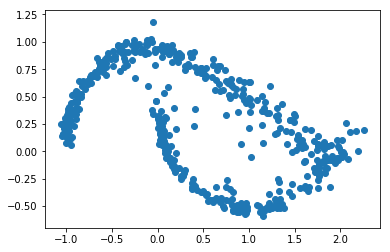


Epoch: 2000 / 5000


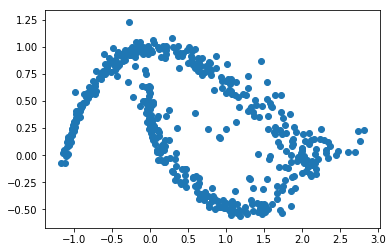


Epoch: 2100 / 5000


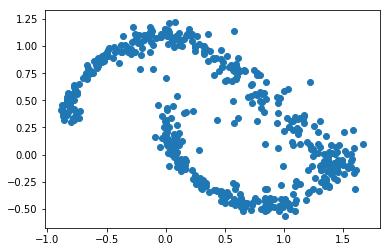


Epoch: 2200 / 5000


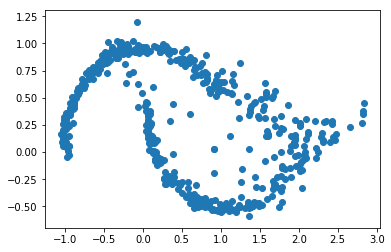


Epoch: 2300 / 5000


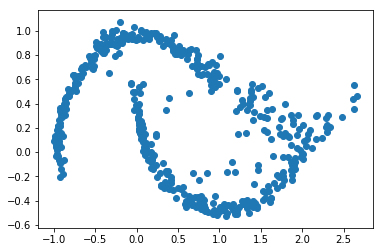


Epoch: 2400 / 5000


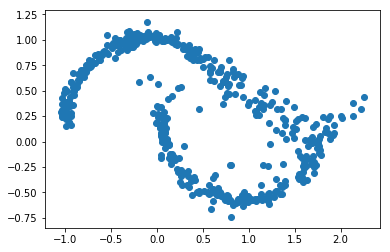


Epoch: 2500 / 5000


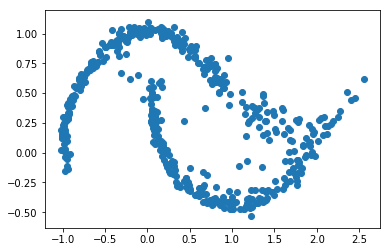


Epoch: 2600 / 5000


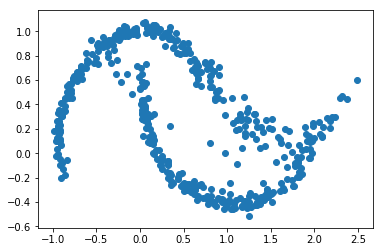


Epoch: 2700 / 5000


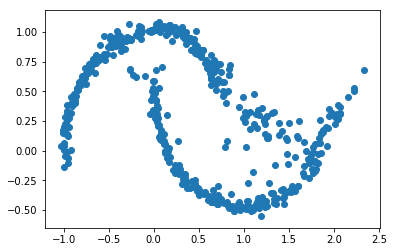


Epoch: 2800 / 5000


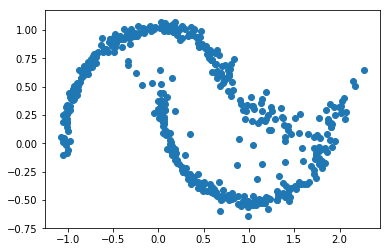


Epoch: 2900 / 5000


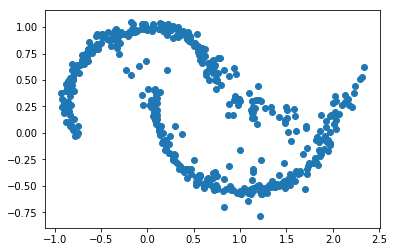


Epoch: 3000 / 5000


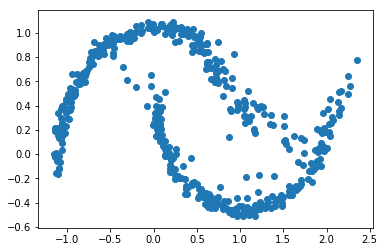


Epoch: 3100 / 5000


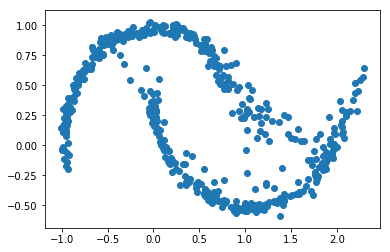


Epoch: 3200 / 5000


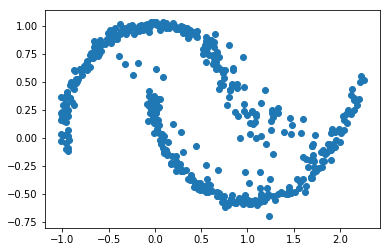


Epoch: 3300 / 5000


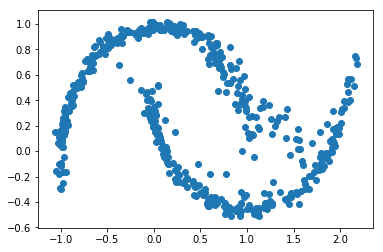


Epoch: 3400 / 5000


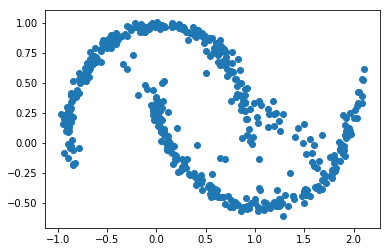


Epoch: 3500 / 5000


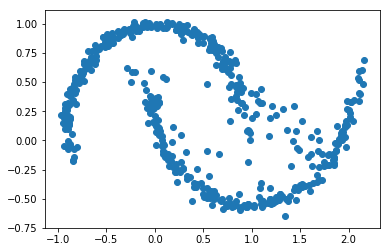


Epoch: 3600 / 5000


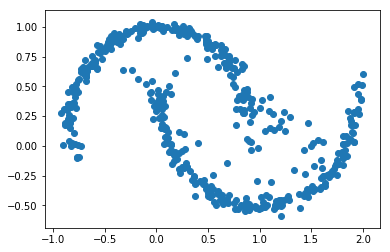


Epoch: 3700 / 5000


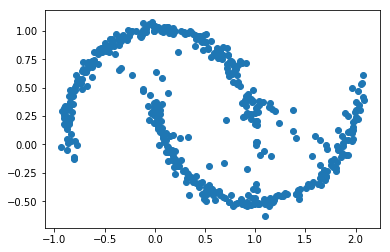


Epoch: 3800 / 5000


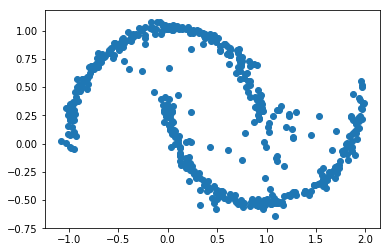


Epoch: 3900 / 5000


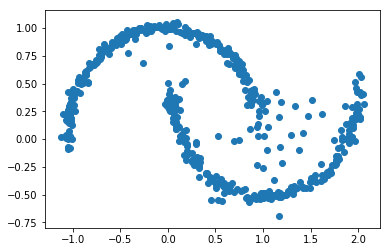


Epoch: 4000 / 5000


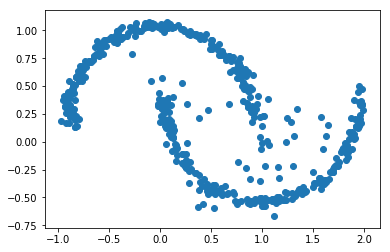


Epoch: 4100 / 5000


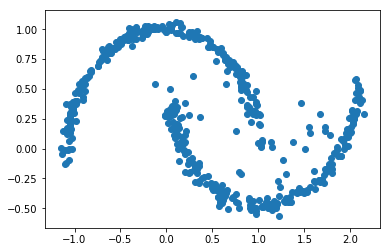


Epoch: 4200 / 5000


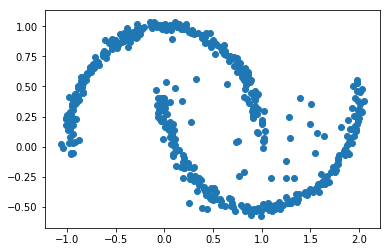


Epoch: 4300 / 5000


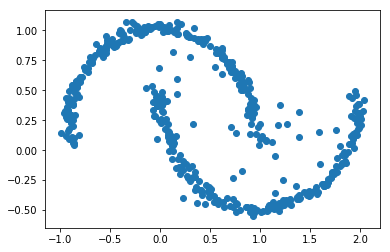


Epoch: 4400 / 5000


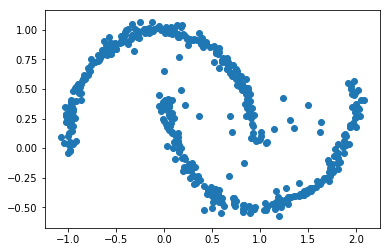


Epoch: 4500 / 5000


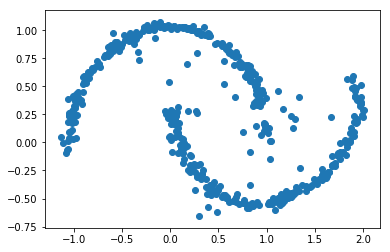


Epoch: 4600 / 5000


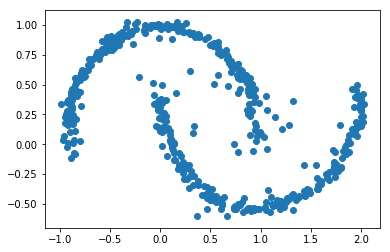


Epoch: 4700 / 5000


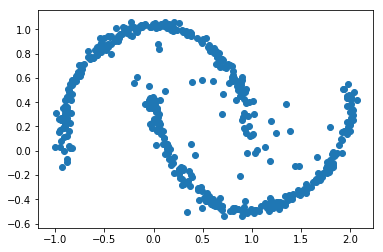


Epoch: 4800 / 5000


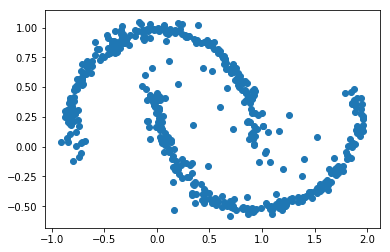


Epoch: 4900 / 5000


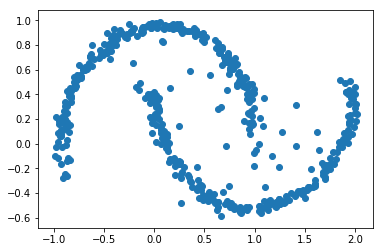

In [52]:
epochs = 5000

for epoch in range(epochs):
  for batch in train_dataset:
    train(batch)
    
  if epoch % 100 == 0:
    print(f'\nEpoch: {epoch} / {epochs}')
    samples = sample()
    plt.scatter(samples[:, 0], samples[:, 1])
    plt.show()